In [1]:
%matplotlib notebook
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from data_loader import produce_dataset, get_dataloaders, dataset_plot
from train import *
from test_function import *
from model_nn import Koopman
import numpy as np
import torch
initial_out = sys.stdout

In [ ]:
x_range = np.array([2.,2.,np.pi])
u_range = np.array([1.5,0.5])
SimLength=10
Ntraj = 100000
Ts=0.1
path = produce_dataset(x_range,u_range,SimLength,Ntraj,Ts)
sys.stdout = initial_out
print(path)
dataset_plot(path,num=500)

In [2]:
path = './dataset/state-[2.         2.         3.14159265]_input-[1.5 0.5]_10x100000_Ts_0.1'
K = 8
arg = {
    'encoder':[3,32,64,K],
    'decoder':[K+3,128,64,32,3],
    'type':'unmasked',
    'hyper':[1.0,3.0,0.3,1e-7,1e-7,1e-7,0.,10],
    'optim':['Adam',1e-3],#first give the optimizer name, then earning rate. For Adadelta, also need forgetting rate
    'batch size': 16
}

epochs = 100
# get dataloaders
train_loader, val_loader, test_loader = get_dataloaders(path,arg['batch size'])

# start training
file_name = train_the_model(train_loader, val_loader, arg, epochs)
save_model_as_numpy(file_name)

  0%|          | 0/3750 [00:00<?, ?it/s]

Trainer created.


Epoch 100: 100%|██████████| 3750/3750 [04:30<00:00, 13.86it/s, loss=0.167]


en.layers.0.0.weight : torch.Size([32, 3])
en.layers.0.0.bias : torch.Size([32])
en.layers.1.0.weight : torch.Size([64, 32])
en.layers.1.0.bias : torch.Size([64])
en.layers.2.0.weight : torch.Size([8, 64])
en.layers.2.0.bias : torch.Size([8])
de.layers.0.1.weight : torch.Size([128, 11])
de.layers.0.1.bias : torch.Size([128])
de.layers.1.1.weight : torch.Size([64, 128])
de.layers.1.1.bias : torch.Size([64])
de.layers.2.1.weight : torch.Size([32, 64])
de.layers.2.1.bias : torch.Size([32])
de.layers.3.1.weight : torch.Size([3, 32])
de.layers.3.1.bias : torch.Size([3])
K.layer.weight : torch.Size([11, 13])


In [3]:
test_the_model(test_loader, file_name)
print(file_name)

100%|██████████| 1250/1250 [00:37<00:00, 33.72it/s]


General loss: 0.1470295182645321.

MSE loss: 0.000270418961555697.
unmasked_Adam_lr_0.001_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 0.0, 10]_batch_16-07-14-15-27


<IPython.core.display.Javascript object>


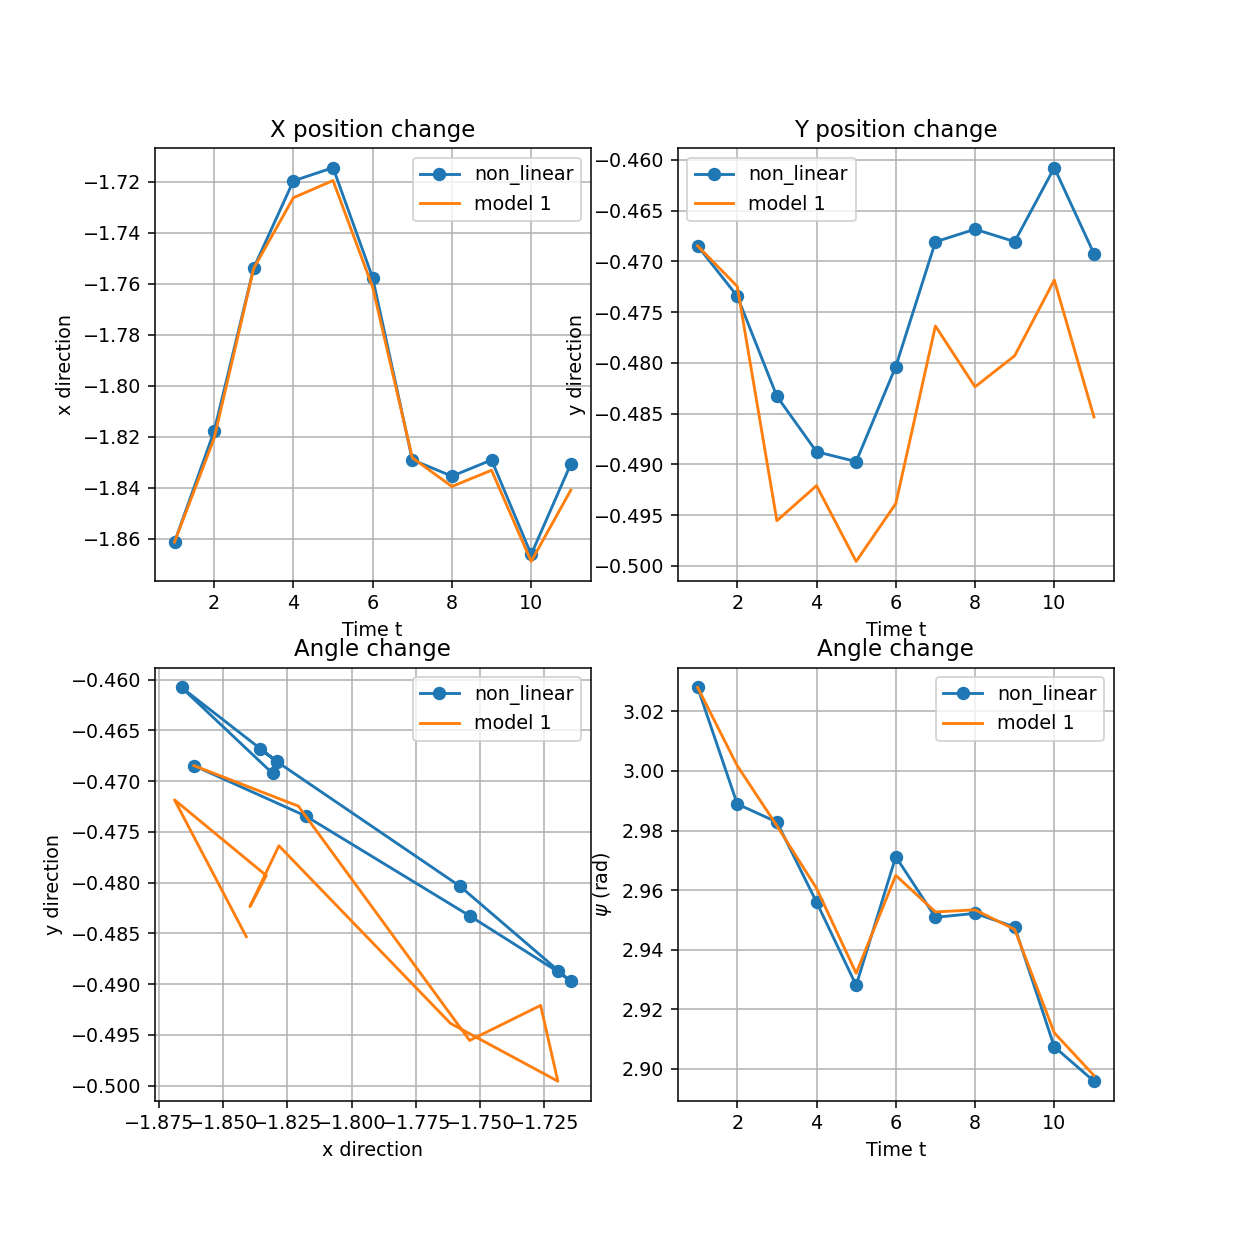

In [4]:
path = './dataset/state-[2.         2.         3.14159265]_input-[1.5 0.5]_10x100000_Ts_0.1'
file_names = [
    'unmasked_Adam_lr_0.001_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 0.0, 10]_batch_16-07-14-15-27',
]
result_sample(path,file_names,index=251)

## Process MATLAB data to numpy files

In [15]:
import os
from scipy.io import loadmat 

def matlab_to_numpy(path):
    #X = 
    files = os.listdir(path)[:-1]
    for f in files:
        a = loadmat(path+f)['input_store']
        print(f)
        print(a[:,0])
path = './dataset/heron_data/'
matlab_to_numpy(path)

data_738456.6392.mat
[8408.341 8408.358 8408.375 8408.391 8408.408 8408.425 8408.441 8408.458
 8408.475 8408.491 8408.508 8408.525 8408.541 8408.558 8408.574 8408.591
 8408.608 8408.625 8408.641 8408.658 8408.675 8408.691 8408.708 8408.725
 8408.741 8408.758 8408.775 8408.791 8408.808 8408.825 8408.841 8408.858
 8408.875 8408.891 8408.908 8408.925 8408.941 8408.958 8408.975 8408.991
 8409.008 8409.025 8409.041 8409.058 8409.075 8409.091 8409.108 8409.125
 8409.141 8409.158 8409.175 8409.191 8409.208 8409.225 8409.241 8409.258
 8409.275 8409.291 8409.308 8409.324 8409.341 8409.358 8409.375 8409.391
 8409.408 8409.425 8409.441 8409.458 8409.475 8409.491 8409.508 8409.525
 8409.541 8409.558 8409.575 8409.591 8409.608 8409.625 8409.641 8409.658
 8409.675 8409.691 8409.708 8409.725 8409.741 8409.758 8409.775 8409.791
 8409.808 8409.825 8409.841 8409.858 8409.875 8409.891 8409.908 8409.925
 8409.941 8409.958 8409.975 8409.991 8410.008 8410.025 8410.041 8410.058
 8410.075 8410.091 8410.108 84